# Example: Introduction to topsbm

Topic modelling with hierarchical stochastic block models

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from topsbm import TopSBM

## Setup: Load a corpus

1. We have a list of documents, each document contains a list of words.
1. We have a list of document titles (optional)

The example corpus consists of 63 articles from Wikipedia taken from 3 different categories (Experimental Physics, Chemical Physics, and Computational Biology).

We use scikit-learn's [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to turn this text into a feature matrix.

In [2]:
# Load texts and vectorize
with open('corpus.txt', 'r') as f:
    docs = f.readlines()

vec = CountVectorizer(token_pattern=r'\S+')
X = vec.fit_transform(docs)

# X is now a sparse matrix of (docs, words)

# titles corresponding to docs
with open('titles.txt', 'r') as f:
    x = f.readlines()
titles = [h.split()[0] for h in x]

In [3]:
# view the data for document 0
print(titles[0])
print(docs[0][:100])

Nuclear_Overhauser_effect
 the nuclear overhauser effect noe is the transfer of nuclear spin polarization from one nuclear spi


## Fit the model

Calling `TopSBM.fit_transform` will:
* construct the bipartite graph between documents and words (samples and features)
* perform Hierarchical Stochastic Block Model inference over the graph
* return an embedding of the samples in the block level with finest granularity

In [4]:
model = TopSBM(random_state=8)
Xt = model.fit_transform(X)

## Plotting the graph and block structure

The following plot shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

* document-nodes are on the left
* word-nodes are on the right
* different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

* on the uppermost level, each node belongs to the same group (square in the middle)
* on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
* only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

In the code, the lowest level is known as level 0, with coarser levels 1, 2, ...

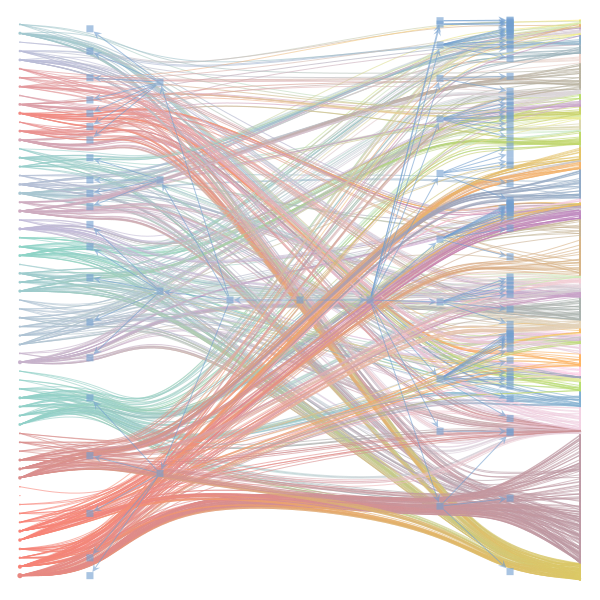

In [5]:
model.plot_graph(n_edges=1000)

## Topics

For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!

In [6]:
topics = pd.DataFrame(model.groups_[1]['p_w_tw'],
                      index=vec.get_feature_names())

In [7]:
for topic in topics.columns:
    print(topics[topic].nlargest(10))
    print()

the     0.113718
of      0.111913
a       0.110108
in      0.108303
is      0.108303
an      0.088448
as      0.088448
by      0.081227
that    0.081227
at      0.070397
Name: 0, dtype: float64

to       0.014684
and      0.014186
for      0.012444
with     0.011946
which    0.011448
on       0.011200
can      0.010951
or       0.010453
from     0.010204
this     0.009955
Name: 1, dtype: float64

been           0.017065
about          0.015017
since          0.014334
both           0.013652
large          0.012969
research       0.012969
model          0.011604
up             0.011604
data           0.010922
information    0.010922
Name: 2, dtype: float64

where           0.013986
physics         0.011988
if              0.010989
because         0.009990
will            0.009491
example         0.008991
no              0.008991
experimental    0.008492
small           0.008492
considered      0.007992
Name: 3, dtype: float64

proteins      0.012931
sequence      0.012931
dna           

## Topic-distribution in each document

Which level-1 topics contribute to each document?

In [8]:
pd.DataFrame(model.groups_[1]['p_tw_d'],
             columns=titles)

,Nuclear_Overhauser_effect,Quantum_solvent,Rovibrational_coupling,Effective_field_theory,Chemical_physics,Rotational_transition,Dynamic_nuclear_polarisation,Knight_shift,Polarizability,Anisotropic_liquid,...,Louis_and_Beatrice_Laufer_Center_for_Physical_and_Quantitative_Biology,Law_of_Maximum,Enzyme_Function_Initiative,SnoRNA_prediction_software,Sepp_Hochreiter,Aureus_Sciences,IEEE/ACM_Transactions_on_Computational_Biology_and_Bioinformatics,Knotted_protein,BioUML,De_novo_transcriptome_assembly
0,0.062937,0.072,0.041176,0.051163,0.14,0.121622,0.037801,0.087912,0.024664,0.193548,...,0.107692,0.108108,0.034014,0.095238,0.031359,0.133333,0.15625,0.084906,0.049751,0.021845
1,0.265734,0.360,0.258824,0.311628,0.32,0.270270,0.278351,0.274725,0.199552,0.258065,...,0.276923,0.391892,0.295918,0.357143,0.209059,0.311111,0.21875,0.292453,0.338308,0.305825
2,0.048951,0.128,0.035294,0.046512,0.08,0.040541,0.020619,0.054945,0.038117,0.000000,...,0.353846,0.054054,0.163265,0.023810,0.205575,0.222222,0.50000,0.103774,0.189055,0.114078
3,0.111888,0.144,0.123529,0.148837,0.18,0.121622,0.116838,0.065934,0.114350,0.161290,...,0.107692,0.243243,0.074830,0.095238,0.104530,0.000000,0.00000,0.103774,0.029851,0.084951
4,0.000000,0.024,0.017647,0.000000,0.00,0.000000,0.000000,0.010989,0.024664,0.000000,...,0.046154,0.000000,0.241497,0.190476,0.229965,0.066667,0.03125,0.141509,0.199005,0.264563
5,0.055944,0.016,0.247059,0.027907,0.02,0.162162,0.044674,0.021978,0.199552,0.000000,...,0.000000,0.013514,0.003401,0.023810,0.027875,0.044444,0.00000,0.018868,0.004975,0.004854
6,0.195804,0.032,0.029412,0.181395,0.06,0.013514,0.226804,0.219780,0.105381,0.129032,...,0.000000,0.000000,0.013605,0.000000,0.020906,0.000000,0.00000,0.028302,0.004975,0.016990
7,0.069930,0.056,0.070588,0.088372,0.10,0.121622,0.075601,0.087912,0.087444,0.064516,...,0.015385,0.094595,0.023810,0.047619,0.045296,0.000000,0.00000,0.056604,0.009950,0.033981
8,0.000000,0.032,0.035294,0.018605,0.00,0.000000,0.000000,0.021978,0.026906,0.000000,...,0.015385,0.013514,0.027211,0.095238,0.031359,0.044444,0.00000,0.056604,0.009950,0.029126
9,0.188811,0.136,0.141176,0.125581,0.10,0.148649,0.199313,0.153846,0.177130,0.193548,...,0.076923,0.081081,0.122449,0.071429,0.094077,0.177778,0.09375,0.113208,0.164179,0.123786


## Extra: Clustering of documents - for free.

The stochastic block models clusters the documents into groups. We do not need to run an additional clustering to obtain this grouping.

For a query article, we can return all articles from the same group

In [9]:
cluster_labels = pd.DataFrame(model.groups_[1]['p_td_d'],
                              columns=titles).idxmax(axis=0)
cluster_idx = cluster_labels['Rovibrational_coupling']
cluster_labels[cluster_labels == cluster_idx]

Rovibrational_coupling     2
Rotational_transition      2
Polarizability             2
Molecular_vibration        2
Empirical_formula          2
Newton's_laws_of_motion    2
Einstein–de_Haas_effect    2
Euler's_laws_of_motion     2
dtype: int64